In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import correlate

In [67]:
#FONCTIONS UTILISEES
def compute_hist(img, channels):
    return cv2.calcHist(img, channels=channels, mask=None, histSize=[256], ranges=[0,256])

error: ignored

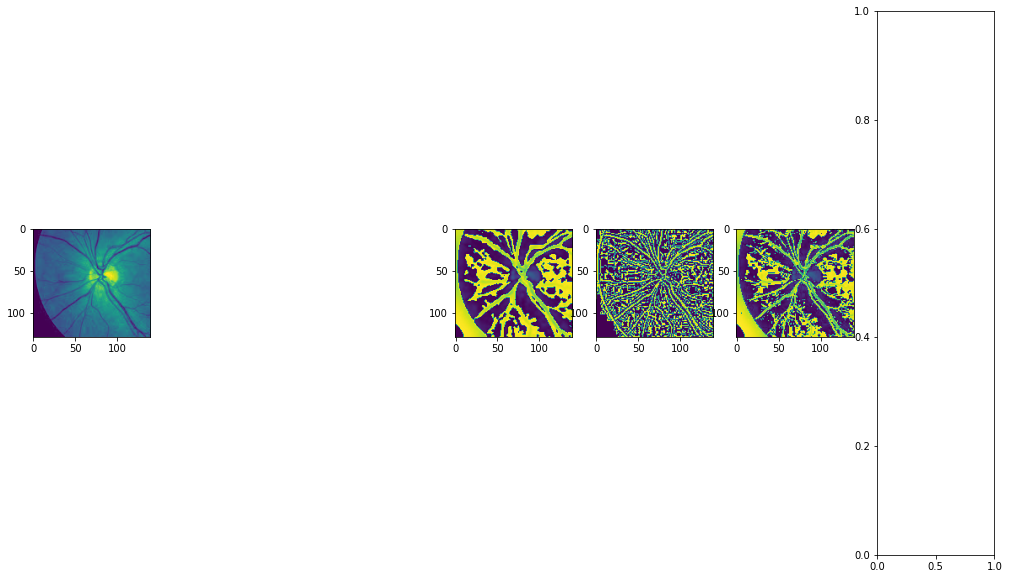

In [131]:
img_retine = cv2.imread("retine.jpg")

plot_nb = 20

#Q1 Charger et afficher
#plt.figure(figsize=(20,5))
#plt.subplot(1,plot_nb,1)
#plt.imshow(cv2.cvtColor(img_retine, cv2.COLOR_BGR2RGB))


#Q2 Imagette dans l'image

#plt.subplot(1,plot_nb,2)
#Pas la même image mais on peut immaginer un truc comme ça
#imagette = img_retine[50:180,10:150]
#plt.imshow(cv2.cvtColor(imagette, cv2.COLOR_BGR2RGB))


#Q3 Histos de chaque couleur
#0
#plt.subplot(1,plot_nb,3)
#chan0 = compute_hist(imagette, [0])
#plt.plot(chan0)
#1
#plt.subplot(1,plot_nb,4)
#chan0 = compute_hist(imagette, [1])
#plt.plot(chan0)
#2
#plt.subplot(1,plot_nb,5)
#chan0 = compute_hist(imagette, [2])
#plt.plot(chan0)

plt.figure(figsize=(50,10))
plt.subplot(1,plot_nb,6)
	
blue, green, red = cv2.split(imagette)
plt.imshow(green)


#Filtrer
filter_size = (5,5)

# Filter using Gaussian blur function
mean = 0
var = 0.02
background_5 = cv2.GaussianBlur(green, filter_size, mean, var)
#plt.subplot(1,plot_nb,7)
#plt.imshow(background_5)

filter_size2 = (51,51)
background_51 = cv2.GaussianBlur(green, filter_size2, mean, var)
#plt.subplot(1,plot_nb,8)
#plt.imshow(background_51)


diff_51 = green - background_51
diff_5 = green - background_5
diff_5_51 = background_5 - background_51
plt.subplot(1,plot_nb,9)
plt.imshow(diff_5_51)
plt.subplot(1,plot_nb,10)
plt.imshow(diff_5)
plt.subplot(1,plot_nb,11)
plt.imshow(diff_51)



diff_5_51[np.where(diff_5_51>0)[0]] = 1
diff_5_51[np.where(diff_5_51==0)[0]] = 0
plt.subplot(1,plot_nb,12)
plt.imshow(cv2.cvtColor(diff_5_51, cv2.COLOR_BGR2GRAY))
